In [1]:
import os
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
from keras.layers import Input,Lambda, Dense, Flatten
from keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras import layers
from keras.models import Model
from keras import optimizers
from glob import glob
import pathlib
import matplotlib.pyplot as plt


In [2]:
resnet = ResNet50(input_shape = (55,55,3),include_top=False,weights='imagenet')
for layer in resnet.layers:
    layer.trainable = True
out = resnet.output

x = Flatten()(out)
x = Dense(40,activation = 'softmax')(x)

model = Model(inputs=resnet.input,outputs=x)

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 55, 55, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 61, 61, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 28, 28, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 28, 28, 64)   256         ['conv1_conv[0][0]']             
                                                                                              

In [4]:

path_train = pathlib.Path('./images/train/')
path_test = pathlib.Path('./images/test/')
train_images_files = path_test.glob('*/*.jpeg')
test_images_files = path_test.glob('*/*.jpeg')


In [5]:
train_dir = './images/train/'
validation_dir = './images/test/'

train_datagen = ImageDataGenerator(rescale = 1/255)
test_datagen = ImageDataGenerator(rescale=1/255)

batch_size = 30

train_generator = train_datagen.flow_from_directory(
    directory = train_dir,
    target_size=(55,55),
    batch_size=batch_size,
    shuffle=True,
    class_mode='categorical',
    )

validation_generator = test_datagen.flow_from_directory(
    directory = validation_dir,
    target_size=(55,55),
    batch_size=batch_size,
    class_mode='categorical')

Found 27761 images belonging to 40 classes.
Found 10008 images belonging to 40 classes.


In [6]:
epochs = 50
history = model.fit_generator(
    train_generator,
    steps_per_epoch= len(list(train_images_files))//batch_size,
    epochs=epochs,
    validation_data= validation_generator,
    validation_steps=len(list(test_images_files))//batch_size
)

C:\Users\hp\AppData\Local\Temp\ipykernel_10168\853784012.py:2: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/50
333/333 [==============================] - 1027s 2s/step - loss: 2.9359 - accuracy: 0.2854 - val_loss: 5.0818 - val_accuracy: 0.0250
Epoch 2/50
333/333 [==============================] - 820s 2s/step - loss: 1.9326 - accuracy: 0.4409 - val_loss: 4.1934 - val_accuracy: 0.0411
Epoch 3/50
333/333 [==============================] - 795s 2s/step - loss: 1.6161 - accuracy: 0.5277 - val_loss: 2.1722 - val_accuracy: 0.3548
Epoch 4/50
333/333 [==============================] - 815s 2s/step - loss: 1.4502 - accuracy: 0.5605 - val_loss: 2.5551 - val_accuracy: 0.4238
Epoch 5/50
333/333 [==============================] - 560s 2s/step - loss: 1.4261 - accuracy: 0.5787 - val_loss: 1.8852 - val_accuracy: 0.4608
Epoch 6/50
333/333 [==============================] - 603s 2s/step - loss: 1.2577 - accuracy: 0.6172 - val_loss: 2.7263 - val_accuracy: 0.5364
Epoch 7/50
333/333 [==============================] - 561s 2s/step - loss: 1.1498 - accuracy: 0.6456 - val_loss: 1.5760 - val_accuracy: 0.537

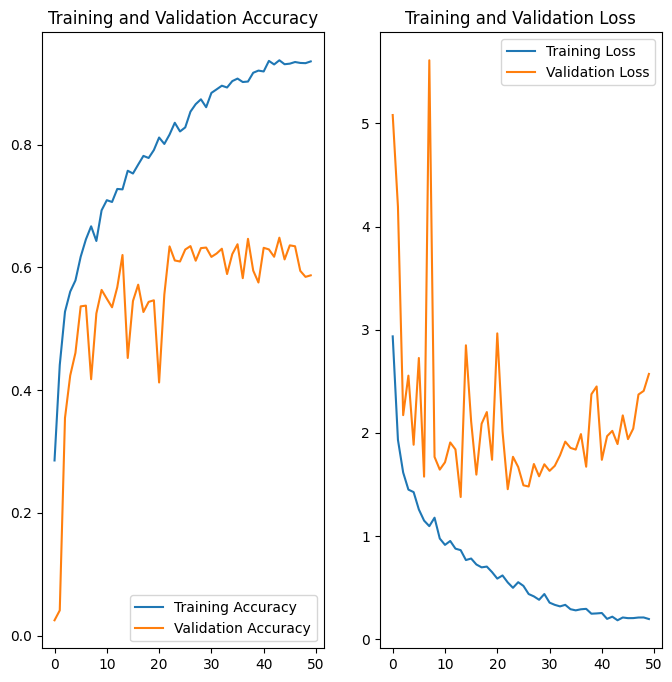

In [7]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()